In [2]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
sns.set(rc={'figure.figsize':(11.7,8.27)})

#### Noncentral Hypergeometric Distribution: 
This distribution can be illustrated as an urn model with bias i.e., balls have different weights or sizes. 
An urn contains a total of N balls and we are taking K balls without replacement, in such a way that the probability of taking a particular ball at a particular draw is equal to its proportion of the total weight of all balls that lie in the urn at that moment.

Given a particular protocol of sampling we might have to chose from two noncentral hypergeometric distribution (Wallenius and Fisher).

According to the guidelines by Agner Fog: https://en.wikipedia.org/wiki/Noncentral_hypergeometric_distributions#Example_1

Since we are sampling workers one by one, we are dealing with a multivariate Wallenius https://en.wikipedia.org/wiki/Wallenius%27_noncentral_hypergeometric_distribution

Here, we are further interested in the case where the weights of the N balls are beta distributed with parameters alpha and beta.
We want to derive an analytical form of the pdf of the probabilites drawn in K samples.

Here I do some simulations.

In [3]:
def SWR(N, K, pr):
    #Sample K elements without replacement
    ret = []
    for _ in range(100):
        tmp = np.random.choice(pr, K, replace = False, p = pr/pr.sum())
        for i in tmp:
            ret.append(i)
    return np.array(ret)

Text(0, 0.5, 'PDF')

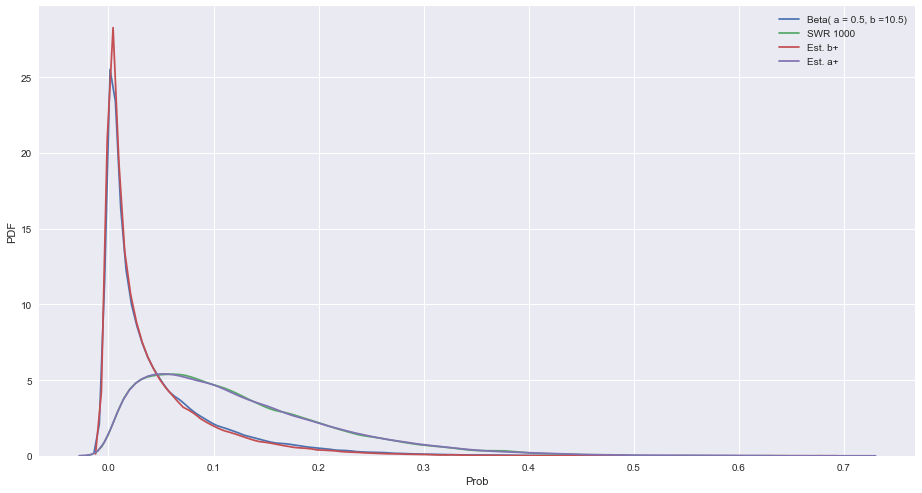

In [20]:
# initial params
N  = 100000
a  = 0.5
b  = 10.5
pr = beta.rvs(a, b, size = N)

# target
sns.distplot(pr, bins = 100, hist = False, label='Beta( a = ' + str(a) + ', b ='+str(b)+')');

# with K = 1000 samples
K = 1000
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));

# Now some estimates for SWR1000
sns.distplot(beta.rvs(a, b + 1, size = N), bins = 100, hist = False, label='Est. b+');
sns.distplot(beta.rvs(a + 1, b, size = N), bins = 100, hist = False, label='Est. a+');

plt.xlabel("Prob")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

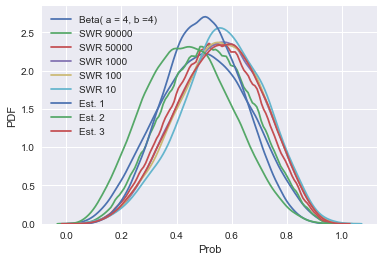

In [4]:
# different set of parameters
N  = 100000
a  = 4
b  = 4
pr = beta.rvs(a, b, size = N)

# target
sns.distplot(pr, bins = 100, hist = False, label='Beta( a = ' + str(a) + ', b ='+str(b)+')');

# with K varying sizes of samllers samples
K = 90000
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));
K = 50000
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));
K = 1000
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));
K = 100
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));
K = 10
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));


# Now some estimates for SWR1000
sns.distplot(beta.rvs(a + 2, b + 2, size = N), bins = 100, hist = False, label='Est. 1');
sns.distplot(beta.rvs(a, b + 1, size = N), bins = 100, hist = False, label='Est. 2');
sns.distplot(beta.rvs(a + 1, b, size = N), bins = 100, hist = False, label='Est. 3');

plt.xlabel("Prob")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

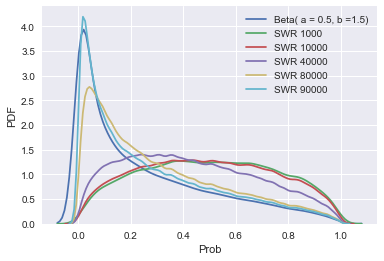

In [5]:
# initial params
N  = 100000
a  = 0.444
b  = 1.5
pr = beta.rvs(a, b, size = N)

# target
sns.distplot(pr, bins = 100, hist = False, label='Beta( a = ' + str(a) + ', b ='+str(b)+')');

# with K = 1000 samples
K = 1000
sns.distplot(SWR(N, 1000, pr), bins = 100, hist = False, label='SWR ' + str(K));

# Effect of K (size of sample)
K = 10000
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));
K = 40000
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));
K = 80000
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));
K = 90000
sns.distplot(SWR(N, K, pr), bins = 100, hist = False, label='SWR ' + str(K));


plt.xlabel("Prob")
plt.ylabel("PDF")

Text(0, 0.5, 'PDF')

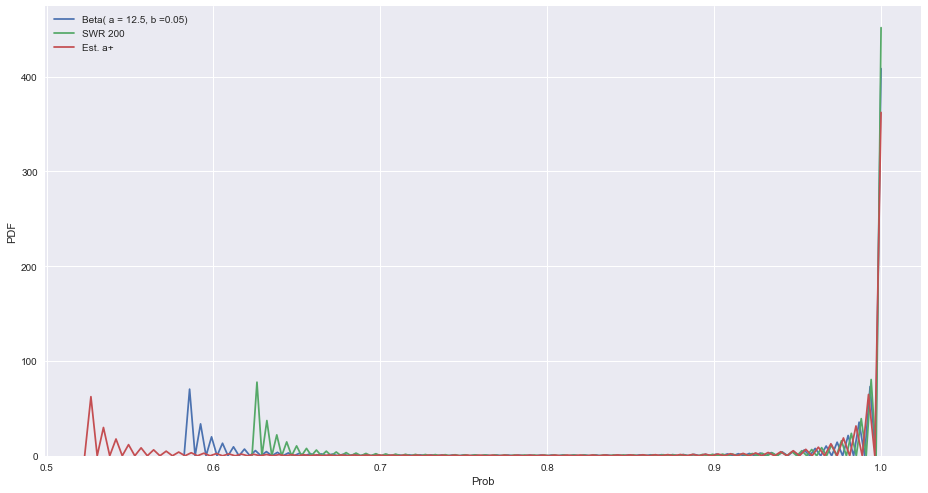

In [35]:
sns.set(rc={'figure.figsize':(15.7,8.27)})

# initial params
N  = 200000
a  = 12.5
b  = .05
pr = beta.rvs(a, b, size = N)

# target
sns.distplot(pr, bins = 100, hist = False, label='Beta( a = ' + str(a) + ', b ='+str(b)+')');

# with K = 1000 samples
K = 200
sns.distplot(SWR(N, 1000, pr), bins = 100, hist = False, label='SWR ' + str(K));

# Now some estimates for SWR1000
sns.distplot(beta.rvs(a+1, b, size = N), bins = 100, hist = False, label='Est. a+');

plt.xlabel("Prob")
plt.ylabel("PDF")

In [36]:
np.array([1.]*3)

array([1., 1., 1.])